In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\kumar\OneDrive\Documents\Fake_news_detection\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df = df.fillna('Null')

In [5]:
df['news']=df['title']+'\n'+df['text']

In [6]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
lines=[]
for title in df.title:
    words=""
    q=title.lower()
    q=re.sub("[^a-z ]", "", q)
    q=q.split(" ")
    for word in q:
        if word not in sw:
            words+=" "+word
    lines.append(words.strip())


In [8]:
lines[99]

'mit nyu yale sued retirement plan fees  new york times'

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(pd.Series(lines)).toarray()
y = df.label

In [11]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [15]:
fit=model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[es], epochs=10)

Epoch 1/10
520/520 [==============================] - 54s 101ms/step - loss: 0.2325 - accuracy: 0.9058 - val_loss: 0.1700 - val_accuracy: 0.9377
Epoch 2/10
520/520 [==============================] - 52s 101ms/step - loss: 0.0582 - accuracy: 0.9806 - val_loss: 0.1942 - val_accuracy: 0.9250
Epoch 3/10
520/520 [==============================] - 51s 97ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.3487 - val_accuracy: 0.9250
Epoch 4/10
520/520 [==============================] - 49s 95ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.4124 - val_accuracy: 0.9252
Epoch 5/10
520/520 [==============================] - 48s 92ms/step - loss: 6.4752e-04 - accuracy: 0.9999 - val_loss: 0.4903 - val_accuracy: 0.9284
Epoch 6/10
520/520 [==============================] - 52s 100ms/step - loss: 3.4094e-04 - accuracy: 0.9999 - val_loss: 0.5198 - val_accuracy: 0.9286
Epoch 7/10
520/520 [==============================] - 53s 103ms/step - loss: 1.2444e-04 - accuracy: 0.9999 - val_loss: 0.5996

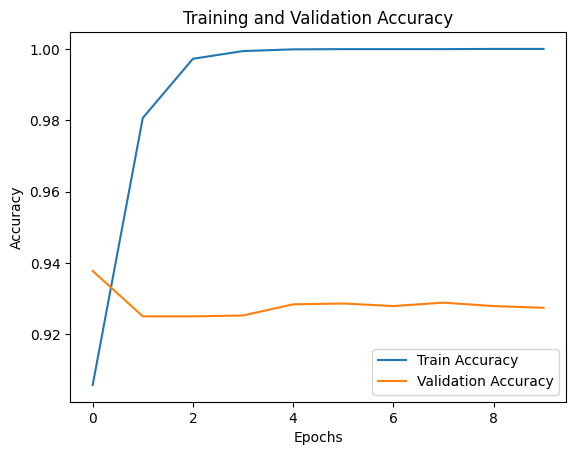

In [29]:
import matplotlib.pyplot as plt
plt.plot(fit.history['accuracy'], label='Train Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

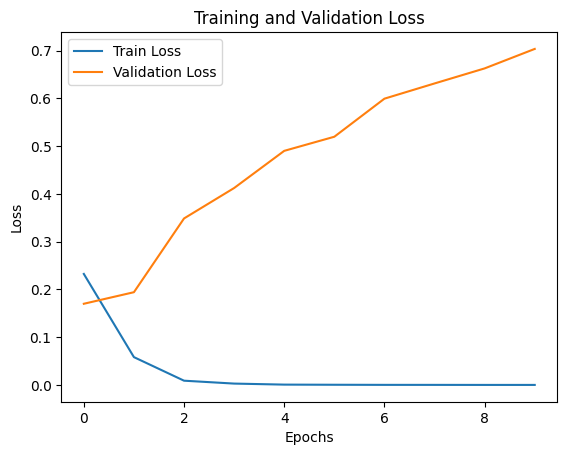

In [30]:
plt.plot(fit.history['loss'], label='Train Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

130/130 [==============================] - 2s 8ms/step


In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Evaluation Results are as followed:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")


Evaluation Results are as followed:
Accuracy: 0.9274
Precision: 0.9096
